# Images from MNIST and 

Maria Leonor Zamora Maass

***

Image is naturally a 3D tensor: RGB channels + spatial dimension

A batch of images amounts to be 4D tensor: [batchSize x nchannels x width x height]

Download MNIST training dataset using [torchvision](https://pypi.python.org/pypi/torchvision/0.1.8)


Other options: 

- For images, packages such as Pillow, OpenCV are useful.
- For audio, packages such as scipy and librosa
- For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful.


In [1]:
import torchvision
import torch
import torchvision.transforms as transforms

In [2]:
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), #
                             ])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)

Processing...
Done!


***

Show the size of train set data (just the size, don’t dump them all out..) and Show the size of train set labels

Access the first image of MNIST train set (you may use any method to display it, such as matplotlib, where you might
need to cast it into numpy)
Make a grid of a batch of train set data

Declare a DataLoader first, with size 4

Use the torchvision.make_grid

Verify that the batch of samples are consistent with the batch of labels (by printing is enough)

What about a different size of batch, say 32?


In [3]:

print trainset.train_data.size()
print trainset.train_labels.size()
#trainloader.batch_size


torch.Size([60000, 28, 28])
torch.Size([60000])


In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5   # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    

def imshow_othernorm(img):
    img = img / 10 + 0.5   # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))


    6     1     5     0


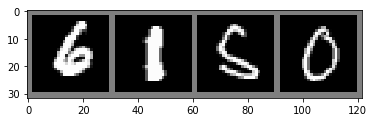

In [5]:

# show some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# print images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s'%labels[j]for j in range(4)))  # This range is because batch-size is 4



    4     7     7     5


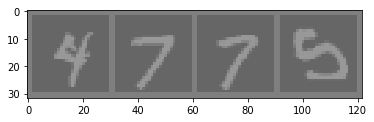

In [6]:
# show some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# print images
imshow_othernorm(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s'%labels[j]for j in range(4)))  # This range is because batch-size is 4

In [7]:
images.size()
#1 channel , 4 for the batch size

torch.Size([4, 1, 28, 28])

### Exercise (MNIST Classification Neural network):

***

Define a Convolution Neural Network and a Classification Cross-Entropy loss and SGD with momentum 0.9


Declare a similar network defined here: http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py and also explained for CIFAR dataset here http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py 




In [8]:
import torch.nn as nn
import torch.nn.functional as F

class Net_lqo(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.pool  = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*4*4, 120) # an affine operation: y = Wx + b
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        return F.log_softmax(x)

net = Net()


You need to find a way to get it to work on MNIST, which is grayscale and of size 28x28

Declare a loss functional using CrossEntropy used for classification

Declare an optimizer using ADAM and prepare a batch of samples from MNIST

Zeroize the gradient of the network

Run forward pass and Print the loss 

Run backward pass and Print the mean, max and min value of gradient module by module


In [9]:

params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight


8
torch.Size([10, 1, 5, 5])


In [10]:

import torch.optim as optim
from torch.autograd import Variable

#criterion = nn.CrossEntropyLoss()                                 # use a Classification Cross-Entropy loss
criterion2 = F.nll_loss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)   # Define an optimizer


In [11]:

for epoch in range(2): # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):    # Batch from the trainloader (4 size in this case)
        # get the inputs
        inputs, labels = data
        
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        
        #loss = criterion(outputs, labels)
        loss = criterion2(outputs, labels)
        loss.backward()        
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Training')


[1,  2000] loss: 1.396
[1,  4000] loss: 0.644
[1,  6000] loss: 0.497
[1,  8000] loss: 0.431
[1, 10000] loss: 0.399
[1, 12000] loss: 0.349
[1, 14000] loss: 0.340
[2,  2000] loss: 0.295
[2,  4000] loss: 0.288
[2,  6000] loss: 0.277
[2,  8000] loss: 0.272
[2, 10000] loss: 0.232
[2, 12000] loss: 0.256
[2, 14000] loss: 0.270
Finished Training
